In [1]:
from random import randrange

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [142]:
from qiskit import QuantumCircuit, QuantumRegister


In [5]:
CZ_schema = (
    ((0, 1), (6, 7), (8, 9), (14, 15), (16, 17)),
    ((2, 3), (4, 5), (10, 11), (12, 13), (18, 19)),
    ((1, 2), (9, 10), (17, 18)),
    ((5, 6), (13,14)),
    ((0, 4), (2, 6), (9, 13), (11, 15)),
    ((4, 8), (6, 10), (13, 17), (15, 19)),
    ((1, 5), (3, 7), (8, 12), (10, 14)),
    ((5, 9), (7, 11), (12, 16), (14, 18))
)

In [32]:
def boixo_circuit(n_qubits, CZ_schema, depth):
    register = QuantumRegister(n_qubits)
    circuit = QuantumCircuit(register)
    for qubit in range(n_qubits):
        #Initial Hadamard Layer
        circuit.h(register[qubit])
    for layer in range(depth):
        CZ_gates = CZ_schema[layer % len(CZ_schema)]
        for control, target in CZ_gates:
            circuit.cz(register[control], register[target])
        for qubit in range(n_qubits):
            if any(qubit in gate for gate in CZ_gates):
                continue
            if layer == 0:
                circuit.t(register[qubit])
            else:
                prev_CZs = CZ_schema[(layer-1) % len(CZ_schema)]
                if any(qubit in gate for gate in prev_CZs):
                    gate = randrange(3)
                    if layer == 1:
                        circuit.t(register[qubit])
                    elif gate == 0:
                        circuit.t(register[qubit])
                    elif gate == 1:
                        circuit.x(register[qubit])
                    else:
                        circuit.y(register[qubit])
    return register, circuit
                            

In [33]:
register, circuit = boixo_circuit(20, CZ_schema, 40)

In [49]:
def count_ts(circuit, qubit_no):
    return [gate.name for gate in circuit.data if gate._qubit_coupling==[qubit_no]].count('t')

In [163]:
average_count = np.zeros(60,)
odd_count = np.zeros(60,)

for depth in range(5, 305, 5):
    print(depth)
    register, circuit = boixo_circuit(20, CZ_schema, depth)
    t_counts = np.zeros([1000,20])
    for i in range(1000):
        t_counts[i] = np.array([count_ts(circuit, i) for i in range(20)])
    index = depth//5 -1
    average_count[index] = np.mean(np.mean(t_counts, axis=0))
    odd_count[index] = np.sum(np.mean(t_counts % 2 == 1, axis=0))


5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300


In [164]:
depths = list(range(5,305,5))

9.833333333333334


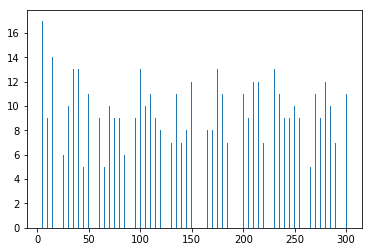

In [166]:
plt.bar(depths, odd_count)
print(np.mean(odd_count))

array([[1., 2., 3., 4., 5.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])